Simple Linear Regression Performance:
MAE: 29688.065188632605
MSE: 1188213139.0702288
R2 Score: 0.02569719767298928

Polynomial Regression Performance (Degree 2):
MAE: 29656.790078717615
MSE: 1185828278.6731682
R2 Score: 0.027652719028217754


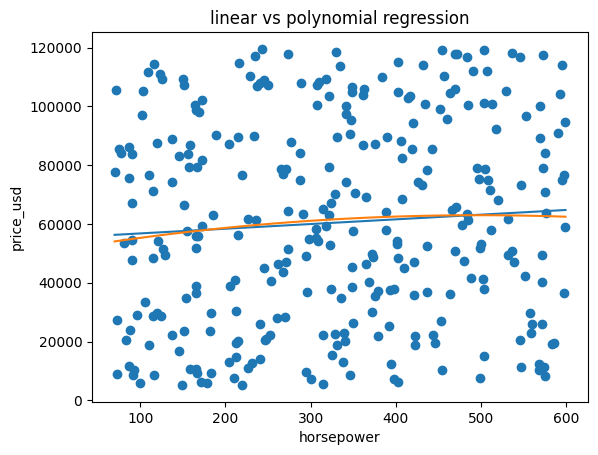

In [2]:



# part d: polynomial regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load cleaned dataset
df = pd.read_csv("cleaned_global_cars_dataset.csv")

# select feature and target
X = df[["horsepower"]]
y = df["price_usd"]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 1. simple linear regression (for comparison)
# -------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

# evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# -------------------------
# 2. polynomial regression (degree = 2)
# -------------------------
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

# evaluation
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# -------------------------
# print results
# -------------------------
print("Simple Linear Regression Performance:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("R2 Score:", r2_linear)

print("\nPolynomial Regression Performance (Degree 2):")
print("MAE:", mae_poly)
print("MSE:", mse_poly)
print("R2 Score:", r2_poly)

# -------------------------
# visualization
# -------------------------
plt.scatter(X, y)
X_range = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 100),
    columns=["horsepower"]
)


# linear line
plt.plot(X_range, linear_model.predict(X_range))

# polynomial curve
plt.plot(X_range, poly_model.predict(poly.transform(X_range)))

plt.xlabel("horsepower")
plt.ylabel("price_usd")
plt.title("linear vs polynomial regression")
plt.show()
